In [75]:
import pandas as pd
import seaborn as sns
blablacar_df = pd.read_csv('data/blablacar.csv')

/opt/homebrew/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Duplicated drivers

Maybe we should run compared analysis by droping duplicated drivers... Is it influencing stats?

In [73]:
round(100*blablacar_df.driver_id.duplicated().sum()/blablacar_df.shape[0])

14

# Clean data

In [78]:
# create new dataset
df = blablacar_df

# remove useless columns (maybe we could verify driver duplicates, it might influence )
df = df.drop(columns=[
    'trip_id', 
    'driver_id', 
    'city_from', 
    'city_to'
])

# format dates, calculate trip anticipation, remove dates
df['publication_date'] = pd.to_datetime(df['publication_date'], errors='coerce')
df['travel_date'] = pd.to_datetime(df['travel_date'], errors='coerce')
df['anticipation_days'] = df.travel_date - df.publication_date
df = df.drop(columns=['publication_date', 'travel_date'])

# calculate price diff, remove other price stuff
df['diff_price_eur'] = df.price_driver_eur - df.price_reco_eur
df = df.drop(columns=['price_reco_adoption', 'price_reco_eur', 'price_driver_eur'])

# is_unbooked : driver failed booking because forgot to accept passenger request ?
#df['is_unbooked'] = df['auto_accept']!=True and df['has_been_cancelled_by_DRVR']!=False and df['seats_booked']>df['seats_requested']

# type profile pic column
df['driver_has_profile_picture'] = df['driver_has_profile_picture'].astype('bool')

df.head()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

# Compare success rate between Newbie & experienced

<AxesSubplot:xlabel='driver_has_profile_picture'>

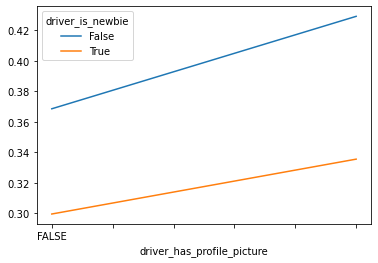

In [32]:
pd.pivot_table(blablacar_df[blablacar_df.driver_has_profile_picture!='Unknown'], 
    values='is_successful_confirmed', 
    columns='driver_is_newbie', 
    index=[
        'driver_has_profile_picture'
    ]
).plot()

In [65]:
# pd.pivot_table(blablacar_df[blablacar_df.driver_has_profile_picture!='Unknown'], 
#     values='is_successful_confirmed', 
#     columns='driver_is_newbie', 
#     index=[
#         'driver_has_profile_picture'
#     ]
# ).plot()
clean_df.dtypes

distance_km                             int64
declared_stopover_count                 int64
has_trip_verbatim                        bool
offered_seats                           int64
auto_accept                              bool
seats_requested                         int64
seats_booked                            int64
seats_confirmed                         int64
has_been_cancelled_by_DRVR               bool
driver_has_profile_picture               bool
driver_no_of_reviews                    int64
driver_avg_rating                     float64
driver_is_newbie                         bool
driver_has_id_check                      bool
driver_has_email_verified                bool
is_successful_confirmed                  bool
anticipation_days             timedelta64[ns]
diff_price_eur                        float64
dtype: object

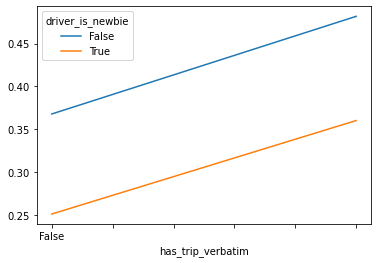

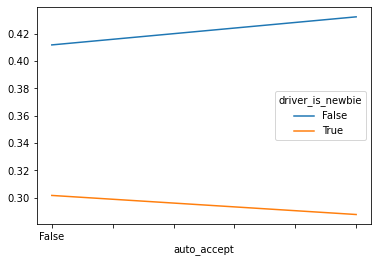

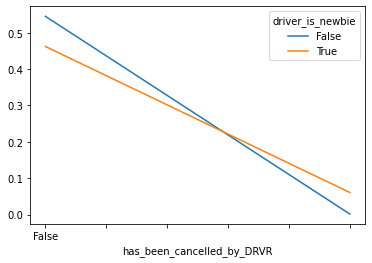

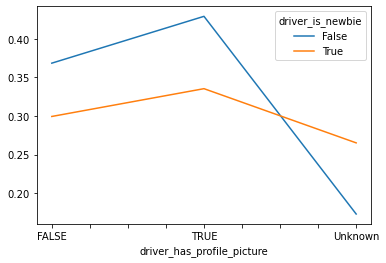

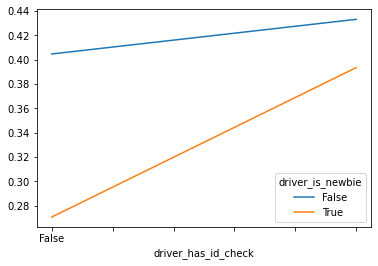

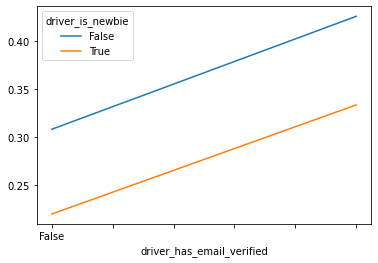

In [66]:
for c in [
    'has_trip_verbatim',
    'auto_accept',
    'has_been_cancelled_by_DRVR',
    'driver_has_profile_picture',
    'driver_has_id_check',
    'driver_has_email_verified'
]:
    pd.pivot_table(blablacar_df, 
        values='is_successful_confirmed', 
        columns='driver_is_newbie', 
        index=c
    ).plot()